<a href="https://colab.research.google.com/github/jinhuioh/hi_ai_himedia/blob/master/%EC%95%99%EC%83%81%EB%B8%94_%EC%97%B0%EC%8A%B5(%EC%87%BC%ED%95%91%EB%AA%B0%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
#앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
from xgboost import  XGBClassifier
from lightgbm import  LGBMClassifier

In [ ]:
#코렙한글쓰기.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 
#!apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [ ]:
#fm._rebuild()

Text(0.5, 1.0, '안녕!')

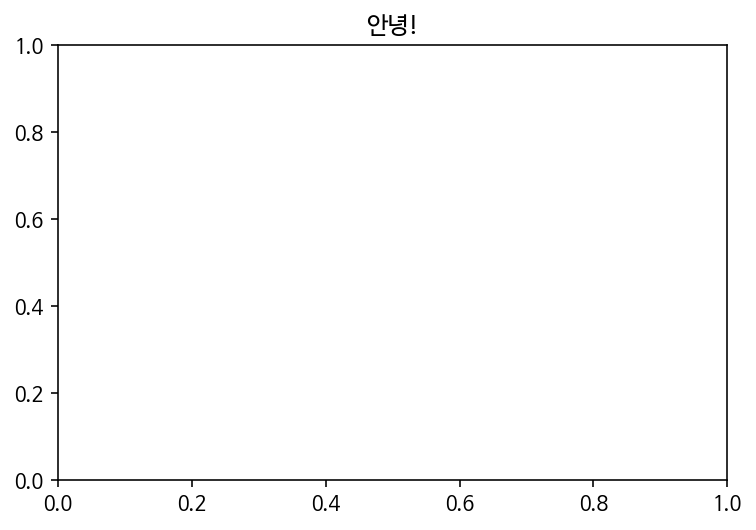

In [ ]:
plt.title('안녕!')

In [2]:
df = pd.read_excel('/content/쇼핑몰_최종2.xlsx')
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),건수합계,네이버 태그 클릭량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,생활/사무용품,평일,월,D.14-18시,M,C.4O대,66.7,28.3,17.9,21.0,32.8,2.9,6225.0,61.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021.0,화장품,휴일,일,D.14-18시,F,C.4O대,89.8,9.3,14.9,17.6,58.2,5.3,3564.0,168.0
4,2020.0,인테리어,평일,월,C.10-14시,F,D.5O대,46.3,28.2,14.1,20.2,37.4,3.4,1101.0,76.0


## 테그4개를 카테고리 분류하는 ML데이터셋입니다.
## 
##


In [ ]:
df.drop(columns=['네이버 태그 클릭량','건수합계'], inplace=True)
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회)
0,2020,패션/화장품,0,3,5,0,1,94.7,18.2,14.0,18.9,48.9,3.8
1,2020,패션/화장품,1,4,5,0,0,97.5,20.2,18.2,15.8,45.8,3.7
2,2020,패션/화장품,0,1,5,0,0,97.5,20.2,18.2,15.8,45.8,3.7
3,2020,패션/화장품,1,5,5,0,0,97.5,20.2,18.2,15.8,45.8,3.7
4,2020,패션/화장품,0,2,0,0,4,19.8,33.3,13.4,22.7,30.5,2.6


In [13]:
df.isnull().sum()

CRI_YM                   10671
TAG                      10671
평일휴일                         0
요일                           0
시간대                          0
성별                           0
연령대                          0
인터넷 쇼핑 이용자 비율 (%)           36
월 평균 구매빈도-1회 미만 (%)         36
월 평균 구매빈도-1~2회 미만 (%)       36
월 평균 구매빈도-2~3회 미만 (%)       36
월 평균 구매빈도-3회 이상 (%)         36
월 평균 구매빈도-평균 (회)            36
건수합계                     10671
네이버 태그 클릭량               10671
dtype: int64

In [14]:
#결측값 제거
df = df.dropna(axis=0)
df.isnull().sum()

CRI_YM                   0
TAG                      0
평일휴일                     0
요일                       0
시간대                      0
성별                       0
연령대                      0
인터넷 쇼핑 이용자 비율 (%)        0
월 평균 구매빈도-1회 미만 (%)      0
월 평균 구매빈도-1~2회 미만 (%)    0
월 평균 구매빈도-2~3회 미만 (%)    0
월 평균 구매빈도-3회 이상 (%)      0
월 평균 구매빈도-평균 (회)         0
건수합계                     0
네이버 태그 클릭량               0
dtype: int64

In [ ]:
df.columns

Index(['CRI_YM', 'TAG', '평일휴일', '요일', '시간대', '성별', '연령대', '인터넷 쇼핑 이용자 비율 (%)',
       '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)', '월 평균 구매빈도-2~3회 미만 (%)',
       '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)'],
      dtype='object')

In [3]:
# 라벨인코딩을 하여 수치가 아닌 값들을 수치화해주자.
encoder = LabelEncoder()
df['평일휴일'] = encoder.fit_transform(df['평일휴일'])


In [4]:
encoder1 = LabelEncoder()
df['요일'] = encoder1.fit_transform(df['요일'])

In [5]:
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

df['시간대'] = encoder2.fit_transform(df['시간대'])
df['성별'] = encoder3.fit_transform(df['성별'])
df['연령대'] = encoder4.fit_transform(df['연령대'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21556 entries, 0 to 21555
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRI_YM                 10885 non-null  float64
 1   TAG                    10885 non-null  object 
 2   평일휴일                   21556 non-null  int64  
 3   요일                     21556 non-null  int64  
 4   시간대                    21556 non-null  int64  
 5   성별                     21556 non-null  int64  
 6   연령대                    21556 non-null  int64  
 7   인터넷 쇼핑 이용자 비율 (%)      21520 non-null  float64
 8   월 평균 구매빈도-1회 미만 (%)    21520 non-null  float64
 9   월 평균 구매빈도-1~2회 미만 (%)  21520 non-null  float64
 10  월 평균 구매빈도-2~3회 미만 (%)  21520 non-null  float64
 11  월 평균 구매빈도-3회 이상 (%)    21520 non-null  float64
 12  월 평균 구매빈도-평균 (회)       21520 non-null  float64
 13  건수합계                   10885 non-null  float64
 14  네이버 태그 클릭량             10885 non-null  float64
dtypes:

In [ ]:
#tag컬럼에서 '홈쇼핑'값을 없애보자-> 어케함...
#df.drop(df['TAG']['홈쇼핑'],inplace=True)
#df.head()

In [15]:
df.loc[1]

CRI_YM                    2020.0
TAG                      생활/사무용품
평일휴일                           0
요일                             3
시간대                            3
성별                             1
연령대                            2
인터넷 쇼핑 이용자 비율 (%)           66.7
월 평균 구매빈도-1회 미만 (%)         28.3
월 평균 구매빈도-1~2회 미만 (%)       17.9
월 평균 구매빈도-2~3회 미만 (%)       21.0
월 평균 구매빈도-3회 이상 (%)         32.8
월 평균 구매빈도-평균 (회)             2.9
건수합계                      6225.0
네이버 태그 클릭량                  61.0
Name: 1, dtype: object

In [ ]:
#라벨인코딩을 해주자
# 지금데이터는 안해줘도 됨. 다 수치화해서
#test,train데이터를 나눠보자.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)']],
    df['TAG'],
    test_size=0.2,
    random_state=42

)

In [17]:
X_train.shape, X_test.shape

((8708, 12), (2177, 12))

In [18]:
y_train.shape, y_test.shape

((8708,), (2177,))

In [19]:
y_train[:10]

20547       취미용품
5508        취미용품
17200       인테리어
17865    생활/사무용품
3061        애완용품
9818        애완용품
12275         패션
10189         패션
17907       인테리어
18941        식료품
Name: TAG, dtype: object

In [20]:
## 단일 모델들에 대한 객체 생성
## voting(hard/soft)

In [21]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 3,
    max_features = 12,
    random_state = 100
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=12, random_state=100)

In [22]:
svc = SVC(
    kernel = 'rbf',
    C=0.1,
    gamma=10,
    probability=True,
    random_state = 10
)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=10, probability=True, random_state=10)

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
dt_predt = dt.predict(X_test)

In [25]:
svc_predt = svc.predict(X_test)

In [26]:
lr_predt = lr.predict(X_test)

In [27]:
dt_acc = accuracy_score(y_test, dt_predt)
svc_acc = accuracy_score(y_test, svc_predt)
lr_acc = accuracy_score(y_test, lr_predt)
dt_acc,svc_acc, lr_acc

(0.11254019292604502, 0.12769866789159393, 0.11988975654570509)

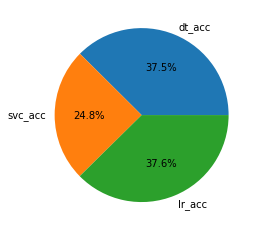

In [28]:
##가장 정확도가 높은 함수를 찾아보자.
accuracyDSL = pd.Series([0.9345,0.6185,0.936],index=['dt_acc','svc_acc','lr_acc'])
plt.pie(accuracyDSL, labels = accuracyDSL.index, autopct = '%.1f%%')
plt.show()

In [29]:
## 하드 보팅
voting_clf1 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='hard'
)
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.1208084519981626

In [30]:
## 소프트 보팅
voting_clf2 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='soft'
)
voting_clf2.fit(X_train, y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.4437299035369775

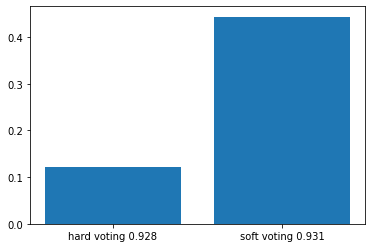

In [31]:
### 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(2)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)
            ])
plt.xticks(x, ['hard voting','soft voting']);

In [ ]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [ ]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.6185

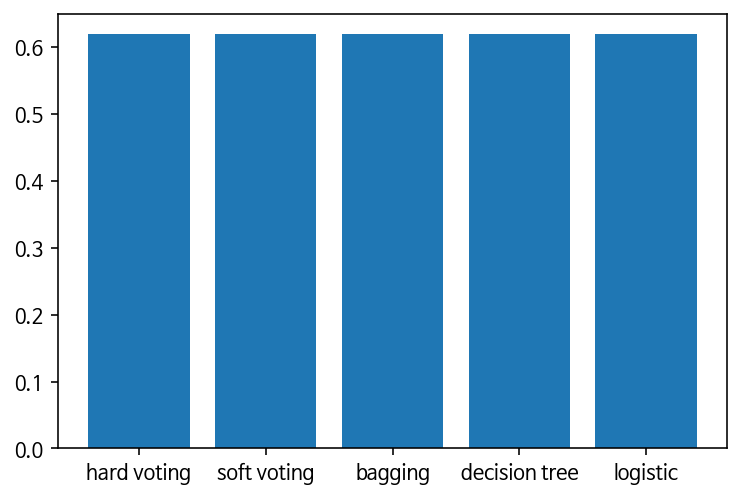

In [ ]:
x = np.arange(5)
plt.bar(x, height= [
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt),
                    accuracy_score(y_test, dt_predt),
                    accuracy_score(y_test, lr_predt)
            ])
plt.xticks(x, ['hard voting','soft voting', 'bagging','decision tree','logistic']);

In [ ]:
confusion_matrix(y_test, soft_voting_predicted)

array([[2474,    0,    0,    0],
       [ 298,    0,    0,    0],
       [ 309,    0,    0,    0],
       [ 919,    0,    0,    0]])

In [ ]:
confusion_matrix(y_test, rf_predt)

array([[2474,    0,    0,    0],
       [ 298,    0,    0,    0],
       [ 309,    0,    0,    0],
       [ 919,    0,    0,    0]])

In [ ]:
gbc = GradientBoostingClassifier(
     random_state=42
).fit(X_train, y_train)

In [ ]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(y_test, gbc_predicted)

0.6185

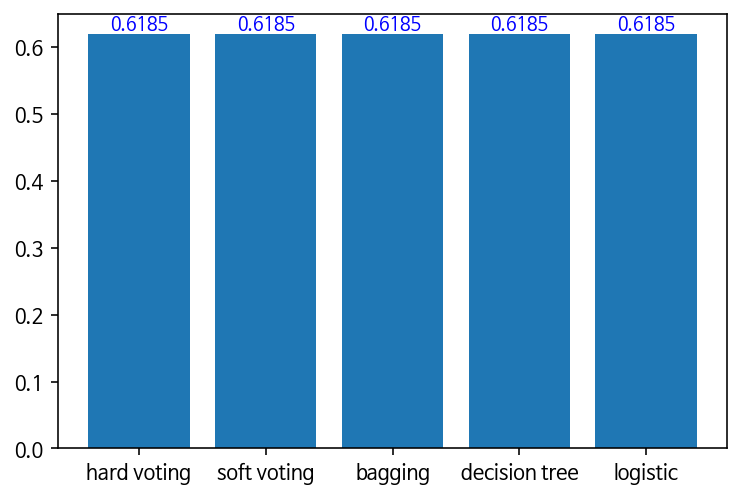

In [ ]:
x = ['hard voting','soft voting', 'bagging','decision tree','logistic']
y = [               accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted),
                    accuracy_score(y_test, rf_predt),
                    accuracy_score(y_test, dt_predt),
                    accuracy_score(y_test, lr_predt)]

import matplotlib.pyplot as plt

plt.bar(x,y)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

In [ ]:
params = {#하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4*3*2=24가지의 경우의 수 생김.
    'max_depth':[3, 5, 7, 10],#key:하이퍼파라메터 명, values는 list타입이어야 함.
    'random_state': [1,3,5],
    'criterion':["gini", "entropy"]#혼란스러운 정도(분류의 정도)를 계산하는 기준
    
}

In [ ]:
##하이퍼 파라메터=> gird search
def grid_search(model, params, k=5):#cv는 꼭 kfold값이 필요하다@!(k값)
    gs_model = GridSearchCV(model, params, cv=k)#모든파라메터에 대해 전부 적용시켜주는 모델 GridSearchCV() 
    #gs_model는 최적의 파라메터가 적용된 모델의 객체
    gs_model.fit(X_train, y_train)
    print(gs_model.best_estimator_)##최적의 파라메터가 적용된 모델 객체
    print('best_score_은>>> ',gs_model.best_score_)#최적의 파라메터가 적용된 모델로 학습한 정확도 결과(acc)
    print('best_params_은>>> ',gs_model.best_params_)#최적의 파라메터(grid_search를 통해서 찾은)
    print(gs_model)##grid_search객체

In [ ]:
# 함수의 모든 파라메터를 보고 싶으면 함수명쓰고 shift+tab하면 됨
grid_search(dt, params, 5)#그리드서치의 모든경우의수는 

DecisionTreeClassifier(max_depth=3, max_features=12, random_state=1)
best_score_은>>>  0.6099893716786496
best_params_은>>>  {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, max_features=12,
                                              random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [ ]:
##테스트 데이터로 검증해보자.
def test_validation(model, X_test, y_test):
    predict_result = model.predict(X_test)#예측한 결과
    acc = accuracy_score(y_test, predict_result)
    print('accuracy>> ', acc)
    cf = confusion_matrix(y_test,predict_result)#답안지넣고, 예측값 넣고
    #실제(c)-->예측(c,sg),실제(sg)-->예측(c,sg)
    #이진분류(binary classification)인 경우에는
    #예측할 수 있는 경우의 수는 4가지이다.
    #4가지를 표 형태로 정리해주는 것이 confusion_matrix!
    #첫번째 행/렬은 c 두번째 행/렬은 sg, abc..순으로 들어감
    print('confusion_matrix>> \n', cf)
    ##confusion matrix는 binary classfication인 경우에는 보기가 괜찮으나,
    ##multi class classification인 경우에는 보기가 힘들다.
    #이럴 때 사용하는 것이 classification report이다.
    c_report = classification_report(y_test, predict_result)
    print('classification_report>> \n', c_report)
    

In [ ]:
##최적의 하이퍼 파라메터로 모델 객체를 생성해서 
##fit()시켜보자.
dt_gs = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state= 1)#그리드 서치를 통해 찾은 최적의 파라메터 적용.
dt_gs.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
test_validation(dt_gs, X_test, y_test)

accuracy>>  0.6185
confusion_matrix>> 
 [[2474    0    0    0]
 [ 298    0    0    0]
 [ 309    0    0    0]
 [ 919    0    0    0]]
classification_report>> 
                       precision    recall  f1-score   support

생활/취미/사무용품/인테리어/골프용품       0.62      1.00      0.76      2474
                 식료품       0.00      0.00      0.00       298
                애완용품       0.00      0.00      0.00       309
              패션/화장품       0.00      0.00      0.00       919

            accuracy                           0.62      4000
           macro avg       0.15      0.25      0.19      4000
        weighted avg       0.38      0.62      0.47      4000



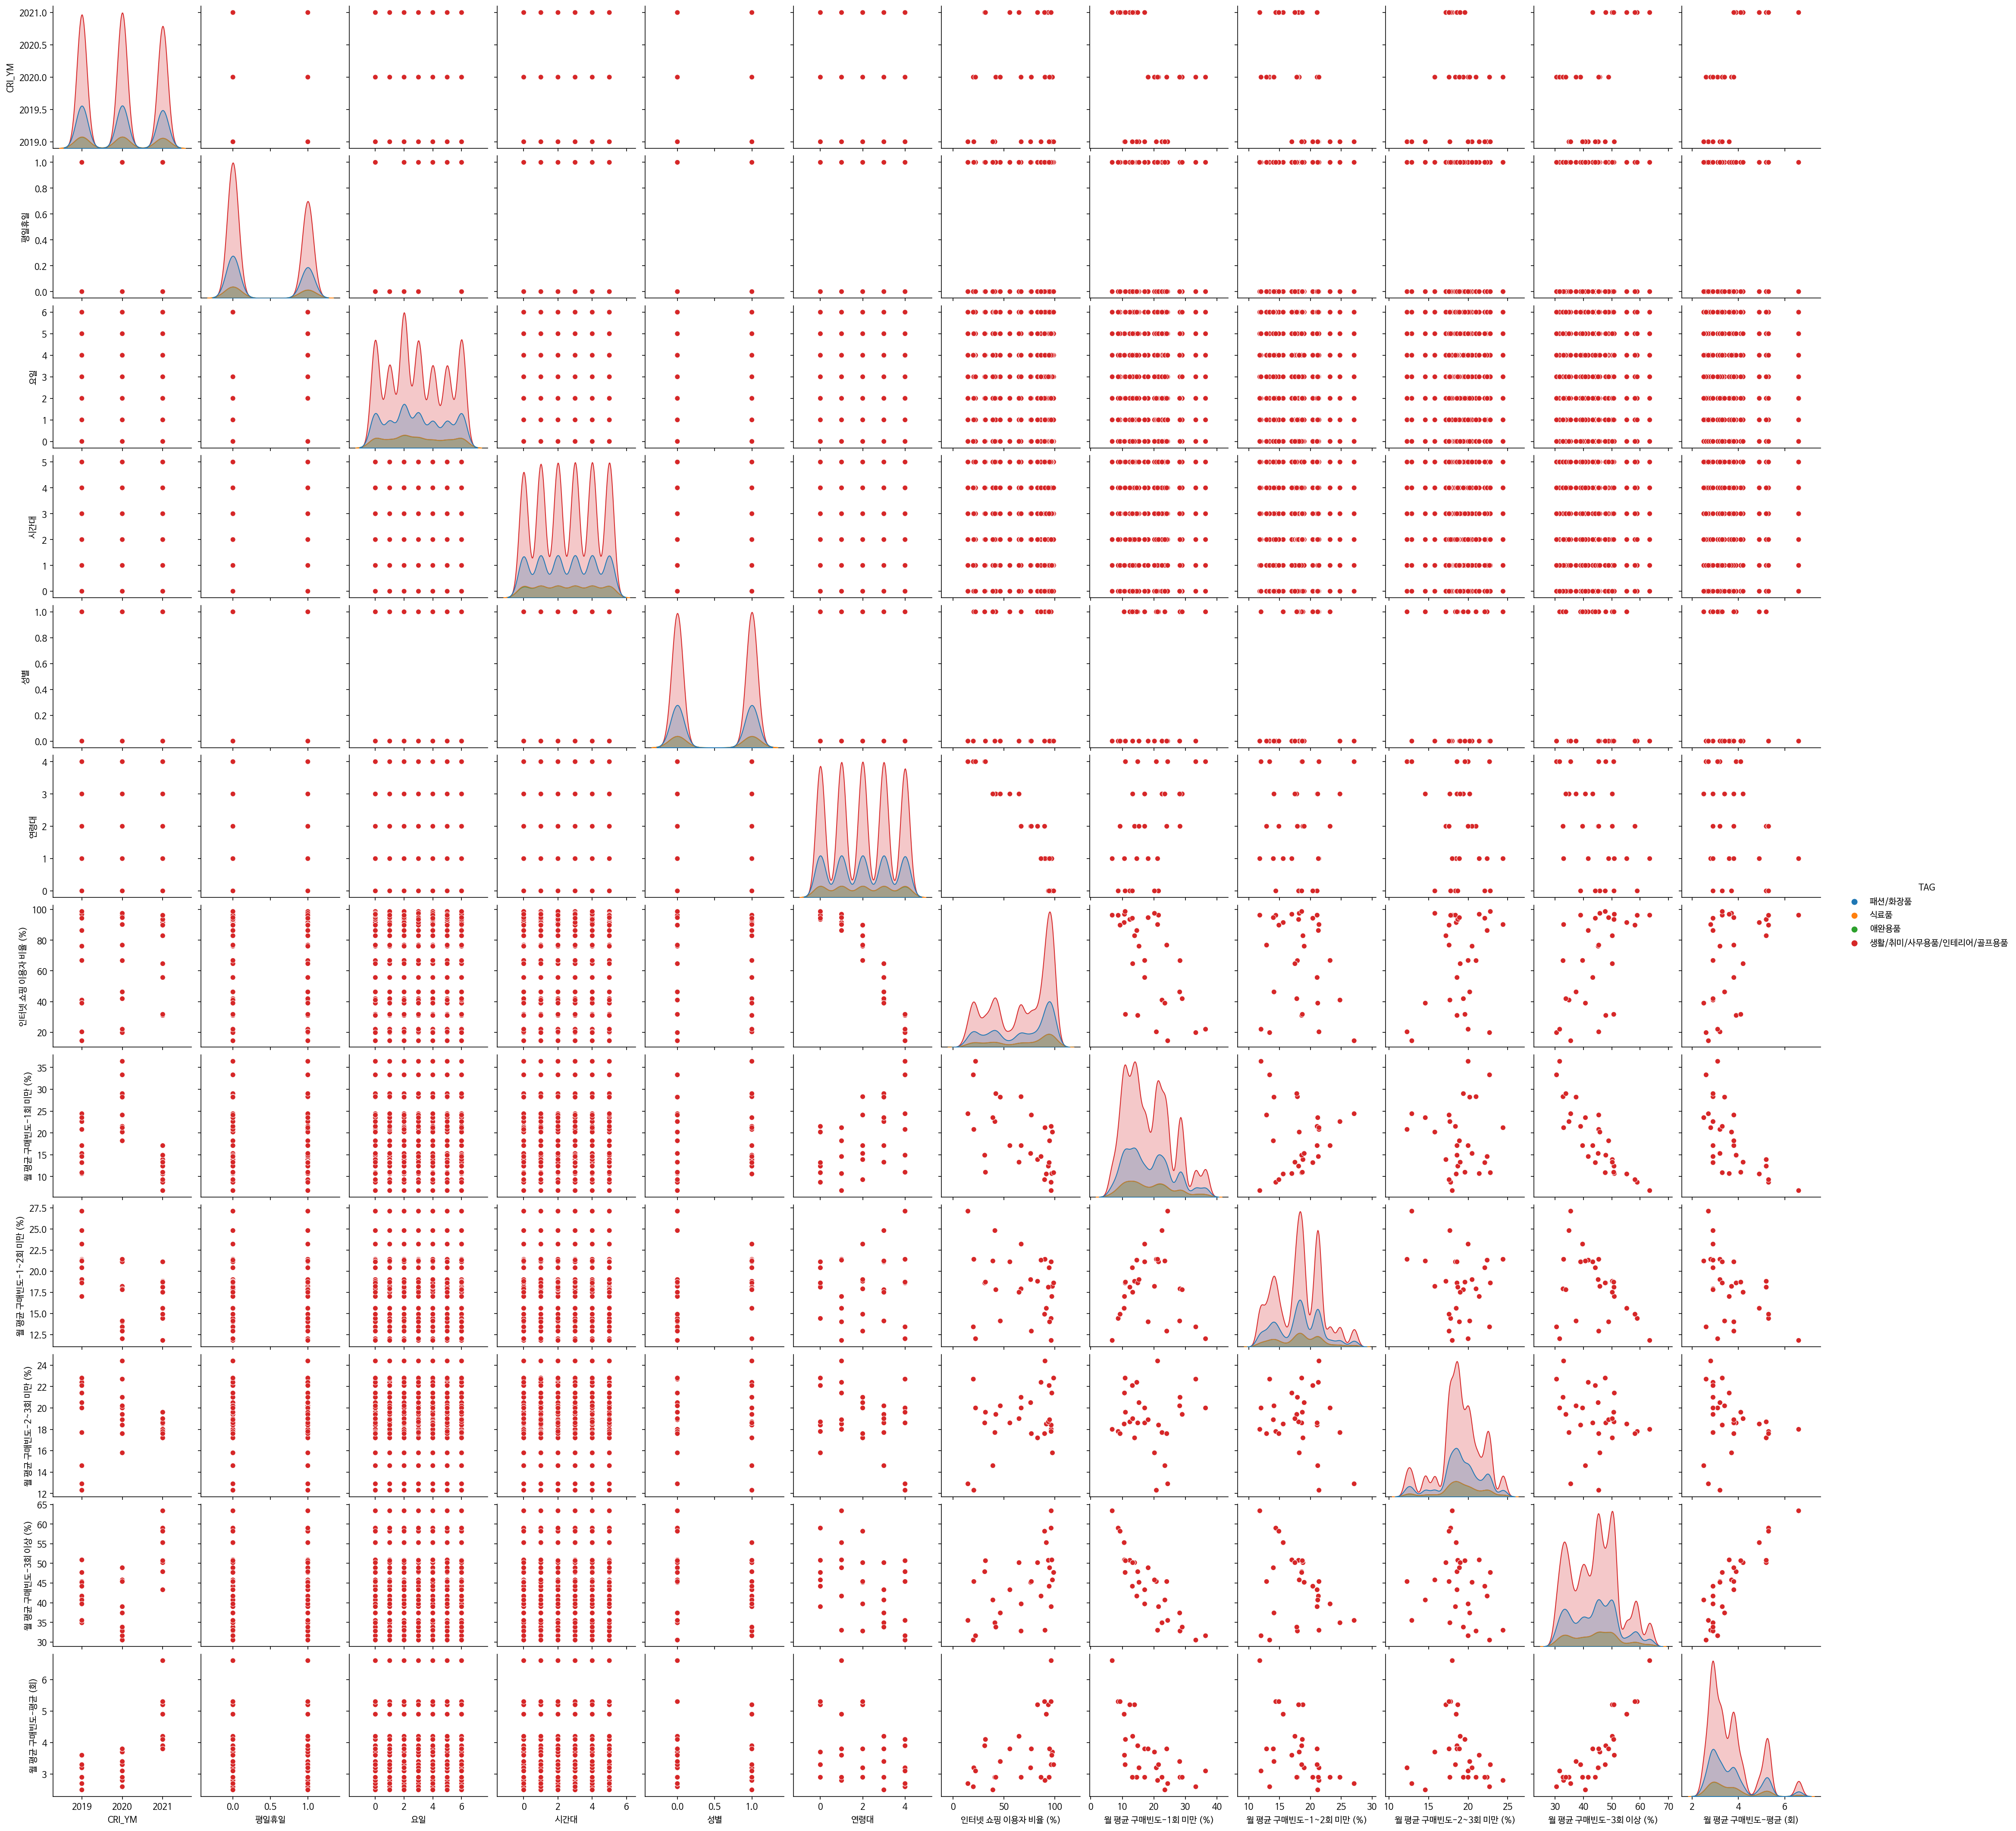

In [ ]:
sns.pairplot(df, hue = 'TAG')

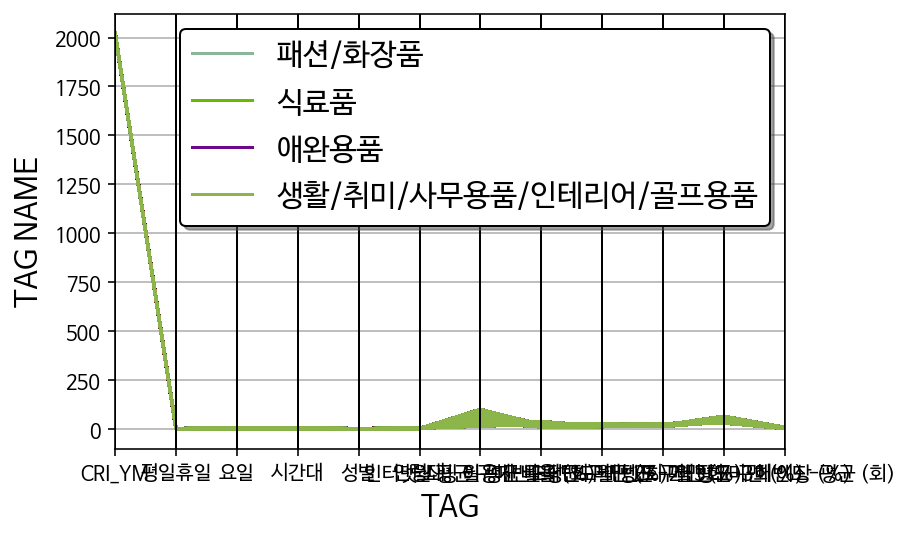

In [ ]:
parallel_coordinates(df, "TAG")
plt.xlabel('TAG', fontsize=15)
plt.ylabel('TAG NAME', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
ss = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns= X_train.columns)

In [ ]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns) 
#테스트 데이터만을 가지고, fit시키면 안됨.!
X_train_s.head()

,CRI_YM,평일휴일,요일,시간대,성별,연령대,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회)
0,0.039098,-0.840661,-1.461281,0.866734,-0.996817,1.425997,-1.669420,1.963590,-1.303935,1.361417,-1.629322,-1.090011
1,-1.199405,-0.840661,-0.462537,-1.484387,1.003193,0.004753,-0.018830,-0.199848,1.342405,0.365872,-0.531440,-0.781169
2,0.039098,-0.840661,0.036836,0.278954,1.003193,-0.705868,0.802952,0.347688,0.856343,1.988242,-1.330984,-0.884116
3,0.039098,-0.840661,-0.462537,1.454515,1.003193,1.425997,-1.592158,2.377581,-1.681984,0.365872,-1.498053,-0.575274
4,0.039098,1.189540,1.035580,1.454515,-0.996817,0.715375,-0.738768,1.282507,-1.114911,0.439616,-0.805910,-0.266432


In [ ]:
ms = MinMaxScaler()

In [ ]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)
X_train_m.head()

,CRI_YM,평일휴일,요일,시간대,성별,연령대,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회)
0,0.5,0.0,0.000000,0.8,0.0,1.00,0.062945,0.895270,0.104575,0.859504,0.000000,0.024390
1,0.0,0.0,0.333333,0.0,1.0,0.50,0.621140,0.347973,0.745098,0.636364,0.279635,0.097561
2,0.5,0.0,0.500000,0.6,1.0,0.25,0.899050,0.486486,0.627451,1.000000,0.075988,0.073171
3,0.5,0.0,0.333333,1.0,1.0,1.00,0.089074,1.000000,0.013072,0.636364,0.033435,0.146341
4,0.5,1.0,0.833333,1.0,0.0,0.75,0.377672,0.722973,0.150327,0.652893,0.209726,0.219512


In [ ]:
def print_metrics(model, X_train):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print('*** Cross val score *** \n   {}'.format(scores))
    print('\n*** Mean Accuracy *** \n   {:.7f}'.format(scores.mean()))
    return scores

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

In [ ]:
#knn함수로 정확도 계산
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
result1 = print_metrics(knn, X_train)
result1

*** Cross val score *** 
   [0.57       0.56875    0.559375   0.55625    0.5625     0.574375
 0.56125    0.57661038 0.57160725 0.55409631]

*** Mean Accuracy *** 
   0.5654814


array([0.57      , 0.56875   , 0.559375  , 0.55625   , 0.5625    ,
       0.574375  , 0.56125   , 0.57661038, 0.57160725, 0.55409631])

In [ ]:
#knn을 StandardScaler()한 df에 fit해서 정확도 계산
knn_s = KNeighborsClassifier()
knn_s.fit(X_train_s, y_train)
result2 = print_metrics(knn_s, X_train_s)
result2

*** Cross val score *** 
   [0.57375    0.5675     0.556875   0.570625   0.5625     0.569375
 0.564375   0.57473421 0.56660413 0.56597874]

*** Mean Accuracy *** 
   0.5672317


array([0.57375   , 0.5675    , 0.556875  , 0.570625  , 0.5625    ,
       0.569375  , 0.564375  , 0.57473421, 0.56660413, 0.56597874])

In [ ]:
#maxmin 스케일링을 하고 knn적용해보자.
knn_m = KNeighborsClassifier(metric='minkowski')
knn_m.fit(X_train_m, y_train)
result3 = print_metrics(knn_m, X_train_m)
result3

*** Cross val score *** 
   [0.5725     0.573125   0.56125    0.5575     0.5625     0.570625
 0.564375   0.57848655 0.56035022 0.54971857]

*** Mean Accuracy *** 
   0.5650430


array([0.5725    , 0.573125  , 0.56125   , 0.5575    , 0.5625    ,
       0.570625  , 0.564375  , 0.57848655, 0.56035022, 0.54971857])

In [ ]:
dt_m = DecisionTreeClassifier()
dt_m.fit(X_train_m, y_train)
result4 = print_metrics(dt_m, X_train_m)
result4

*** Cross val score *** 
   [0.605      0.605625   0.603125   0.6025     0.600625   0.60125
 0.604375   0.60600375 0.60600375 0.58974359]

*** Mean Accuracy *** 
   0.6024251


array([0.605     , 0.605625  , 0.603125  , 0.6025    , 0.600625  ,
       0.60125   , 0.604375  , 0.60600375, 0.60600375, 0.58974359])

In [ ]:
dt_s = DecisionTreeClassifier()
dt_s.fit(X_train_s, y_train)
result5 = print_metrics(dt_s, X_train_s)
result5

*** Cross val score *** 
   [0.605      0.605625   0.603125   0.6025     0.600625   0.60125
 0.604375   0.60600375 0.60600375 0.58974359]

*** Mean Accuracy *** 
   0.6024251


array([0.605     , 0.605625  , 0.603125  , 0.6025    , 0.600625  ,
       0.60125   , 0.604375  , 0.60600375, 0.60600375, 0.58974359])

In [ ]:
dt_predt_m = dt.predict(X_test_m)

In [ ]:
dt_predt_s = dt.predict(X_test_s)

In [ ]:
dt_acc_s = accuracy_score(y_test, dt_predt)
dt_acc_s

0.6185

In [ ]:
dt_acc_m = accuracy_score(y_test, dt_predt)
dt_acc_m

0.6185

In [ ]:
lr_s = LogisticRegression()
lr_s.fit(X_train_s, y_train)
result6 = print_metrics(lr_s, X_train_s)
result6

*** Cross val score *** 
   [0.61       0.61       0.609375   0.609375   0.61       0.61
 0.61       0.61038149 0.61038149 0.61038149]

*** Mean Accuracy *** 
   0.6099894


array([0.61      , 0.61      , 0.609375  , 0.609375  , 0.61      ,
       0.61      , 0.61      , 0.61038149, 0.61038149, 0.61038149])

In [ ]:
lr_m = LogisticRegression()
lr_m.fit(X_train_m, y_train)
result6 = print_metrics(lr_m, X_train_m)
result6

*** Cross val score *** 
   [0.61       0.61       0.609375   0.609375   0.61       0.61
 0.61       0.61038149 0.61038149 0.61038149]

*** Mean Accuracy *** 
   0.6099894


array([0.61      , 0.61      , 0.609375  , 0.609375  , 0.61      ,
       0.61      , 0.61      , 0.61038149, 0.61038149, 0.61038149])

(array([2., 0., 1., 2., 0., 0., 1., 2., 0., 2.]),
 array([0.55409631, 0.55634772, 0.55859912, 0.56085053, 0.56310194,
        0.56535335, 0.56760475, 0.56985616, 0.57210757, 0.57435897,
        0.57661038]),
 <a list of 10 Patch objects>)

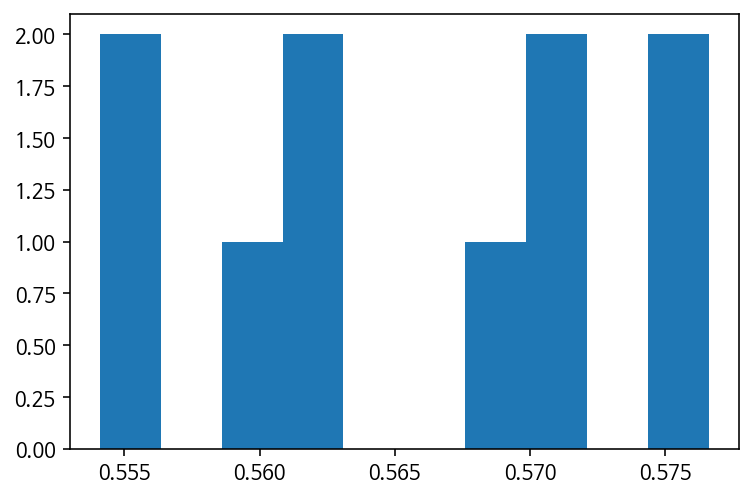

In [ ]:
plt.hist(result1)

(array([1., 0., 0., 1., 1., 3., 1., 1., 0., 2.]),
 array([0.556875  , 0.55866092, 0.56044684, 0.56223276, 0.56401868,
        0.5658046 , 0.56759053, 0.56937645, 0.57116237, 0.57294829,
        0.57473421]),
 <a list of 10 Patch objects>)

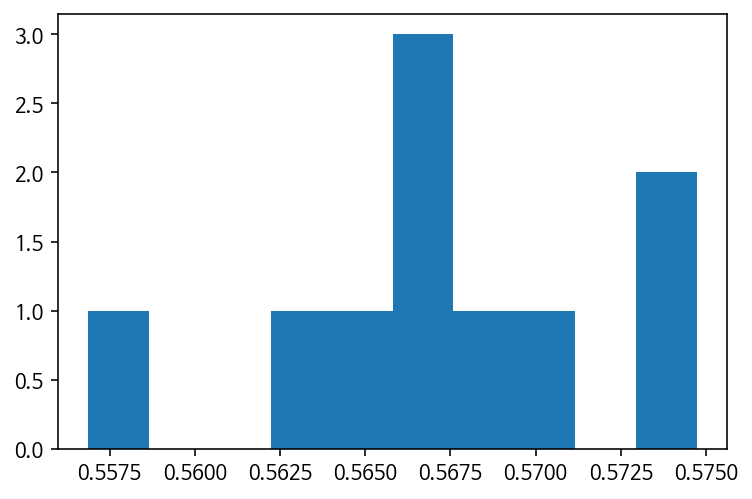

In [ ]:
plt.hist(result2)

(array([1., 0., 1., 1., 2., 1., 0., 2., 1., 1.]),
 array([0.54971857, 0.55259537, 0.55547217, 0.55834897, 0.56122577,
        0.56410256, 0.56697936, 0.56985616, 0.57273296, 0.57560976,
        0.57848655]),
 <a list of 10 Patch objects>)

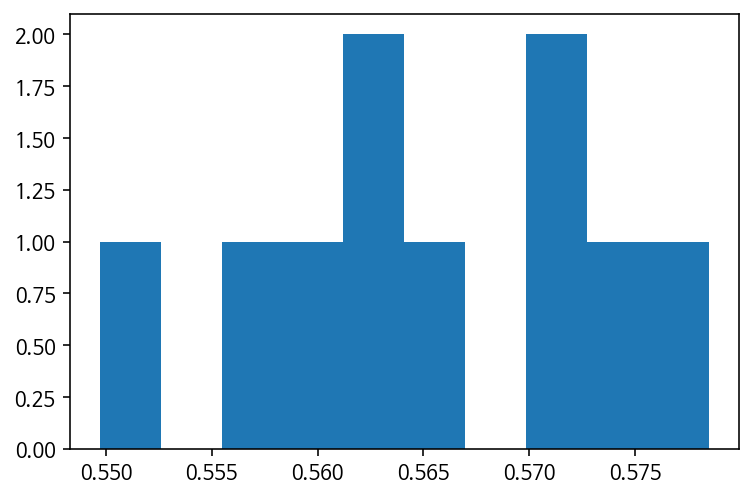

In [ ]:
plt.hist(result3)